In [36]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

In [3]:
#Read archive
df_amz = pd.read_csv("amz_uk_price_prediction_dataset.csv") #The archive its too heavy that it can not be uploaded in github. Please check in kaggle the database

# Visualize first rows
df_amz.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


# Part 1: Analyzing Best-Seller Trends Across Product Categories

## Objective
Understand the relationship between product categories and their best-seller status.


In [4]:
# Displaying the data types of each column in the dataframe
df_amz.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [5]:
# Retrieving the number of rows and columns in the dataframe
df_amz.shape

(2443651, 9)

## 1.1. Crosstab Analysis

1. **Crosstab Creation:**
   - Create a crosstab between the product `category` and the `isBestSeller` status.

2. **Identify Prevalence:**
   - Are there categories where being a best-seller is more prevalent?
   - Hint: Calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [6]:
# 1.1.1.Generate a cross table

crosstab = pd.crosstab(df_amz['category'], df_amz['isBestSeller'], margins=True, margins_name="Total")

crosstab

isBestSeller,False,True,Total
category,,,
3D Printers,247,1,248
3D Printing & Scanning,4065,2,4067
Abrasive & Finishing Products,245,5,250
Action Cameras,1696,1,1697
Adapters,251,3,254
...,...,...,...
Window Treatments,234,5,239
Women,17559,213,17772
Women's Sports & Outdoor Shoes,1939,20,1959


In [7]:
#1.1.2. Identify prevalence. Are there categories where being a best-seller is more prevalent?
crosstab['ProportionBestSeller'] = crosstab[True] / crosstab['Total']
#Sorted values
sorted_crosstab = crosstab.sort_values(by='ProportionBestSeller', ascending=False)
sorted_crosstab

isBestSeller,False,True,Total,ProportionBestSeller
category,,,,
Grocery,9008,556,9564,0.058135
Smart Home Security & Lighting,98,6,104,0.057692
Health & Personal Care,9017,552,9569,0.057686
Mobile Phone Accessories,248,11,259,0.042471
Power & Hand Tools,8353,306,8659,0.035339
...,...,...,...,...
Snowboard Boots,1449,0,1449,0.000000
Internal TV Tuner & Video Capture Cards,253,0,253,0.000000
Boxes & Organisers,911,0,911,0.000000


## 1.2. Statistical Tests

1. **Chi-Square Test:**
   - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

2. **Cramér's V:**
   - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [8]:
#1.2.1.Chi-square Test between IsBestSeller and Category
from scipy.stats import chi2_contingency

#Tests the independence of two categorical variables by comparing observed frequencies to expected frequencies. 
#Interpretation: if p-value < 0.05,  there is a significant association. P-value >= 0.05, there is not enough evidence to conclude a significant association. 


# Crosstab
crosstab_category_bestseller = pd.crosstab(df_amz['category'], df_amz['isBestSeller'])

# Chi-square test
chi2_statistic, chi2_p_value, dof, expected = chi2_contingency(crosstab_category_bestseller)

# Results
print(f"Chi-squared Statistic: {chi2_statistic:.4f}")
print(f"P-value: {chi2_p_value:.4f}")
print("\n")

# Interpretation
print("Interpretation:")
print("-" * 50)
print("The Chi-square test evaluates whether the two categorical variables, 'category' and 'isBestSeller', are independent.")
print("The null hypothesis (H0) assumes that there is no association between the two variables (i.e., they are independent).")
print("The alternative hypothesis (H1) assumes that there is an association between the variables.")
print("\n")
if chi2_p_value < 0.05:
    print(f"Given the p-value of {chi2_p_value:.4f}, which is less than the common significance level of 0.05, we reject the null hypothesis.")
    print("This suggests that there is a significant association between 'category' and 'isBestSeller'.")
else:
    print(f"With a p-value of {chi2_p_value:.4f}, which is greater than 0.05, we fail to reject the null hypothesis.")
    print("This suggests that there is no significant association between 'category' and 'isBestSeller'.")
print("-" * 50)

Chi-squared Statistic: 36540.2027
P-value: 0.0000


Interpretation:
--------------------------------------------------
The Chi-square test evaluates whether the two categorical variables, 'category' and 'isBestSeller', are independent.
The null hypothesis (H0) assumes that there is no association between the two variables (i.e., they are independent).
The alternative hypothesis (H1) assumes that there is an association between the variables.


Given the p-value of 0.0000, which is less than the common significance level of 0.05, we reject the null hypothesis.
This suggests that there is a significant association between 'category' and 'isBestSeller'.
--------------------------------------------------


In [9]:
#1.2.2 Cramer's V Test between IsBestSeller and category to understand the strenght of association
from scipy.stats.contingency import association

# Cramer's V Calculation and Results
cramers_v = association(crosstab_category_bestseller, method="cramer")
print(f"Cramer's V: {cramers_v:.4f}")
print("\n")

# Interpretation
print("Interpretation:")
print("-" * 50)
print("Cramer's V measures the strength of association between two categorical variables, with values ranging from 0 (no association) to 1 (perfect association).")
print("\n")

# Classify the strength of association
if cramers_v < 0.1:
    print(f"The calculated Cramer's V is {cramers_v:.4f}, indicating a very weak association.")
elif cramers_v < 0.3:
    print(f"The calculated Cramer's V is {cramers_v:.4f}, indicating a weak association.")
elif cramers_v < 0.5:
    print(f"The calculated Cramer's V is {cramers_v:.4f}, indicating a moderate association.")
else:
    print(f"The calculated Cramer's V is {cramers_v:.4f}, indicating a strong association.")
print("-" * 50)


Cramer's V: 0.1223


Interpretation:
--------------------------------------------------
Cramer's V measures the strength of association between two categorical variables, with values ranging from 0 (no association) to 1 (perfect association).


The calculated Cramer's V is 0.1223, indicating a weak association.
--------------------------------------------------


## 1.3.Visualizations

1. **Stacked Bar Chart:**
   - Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

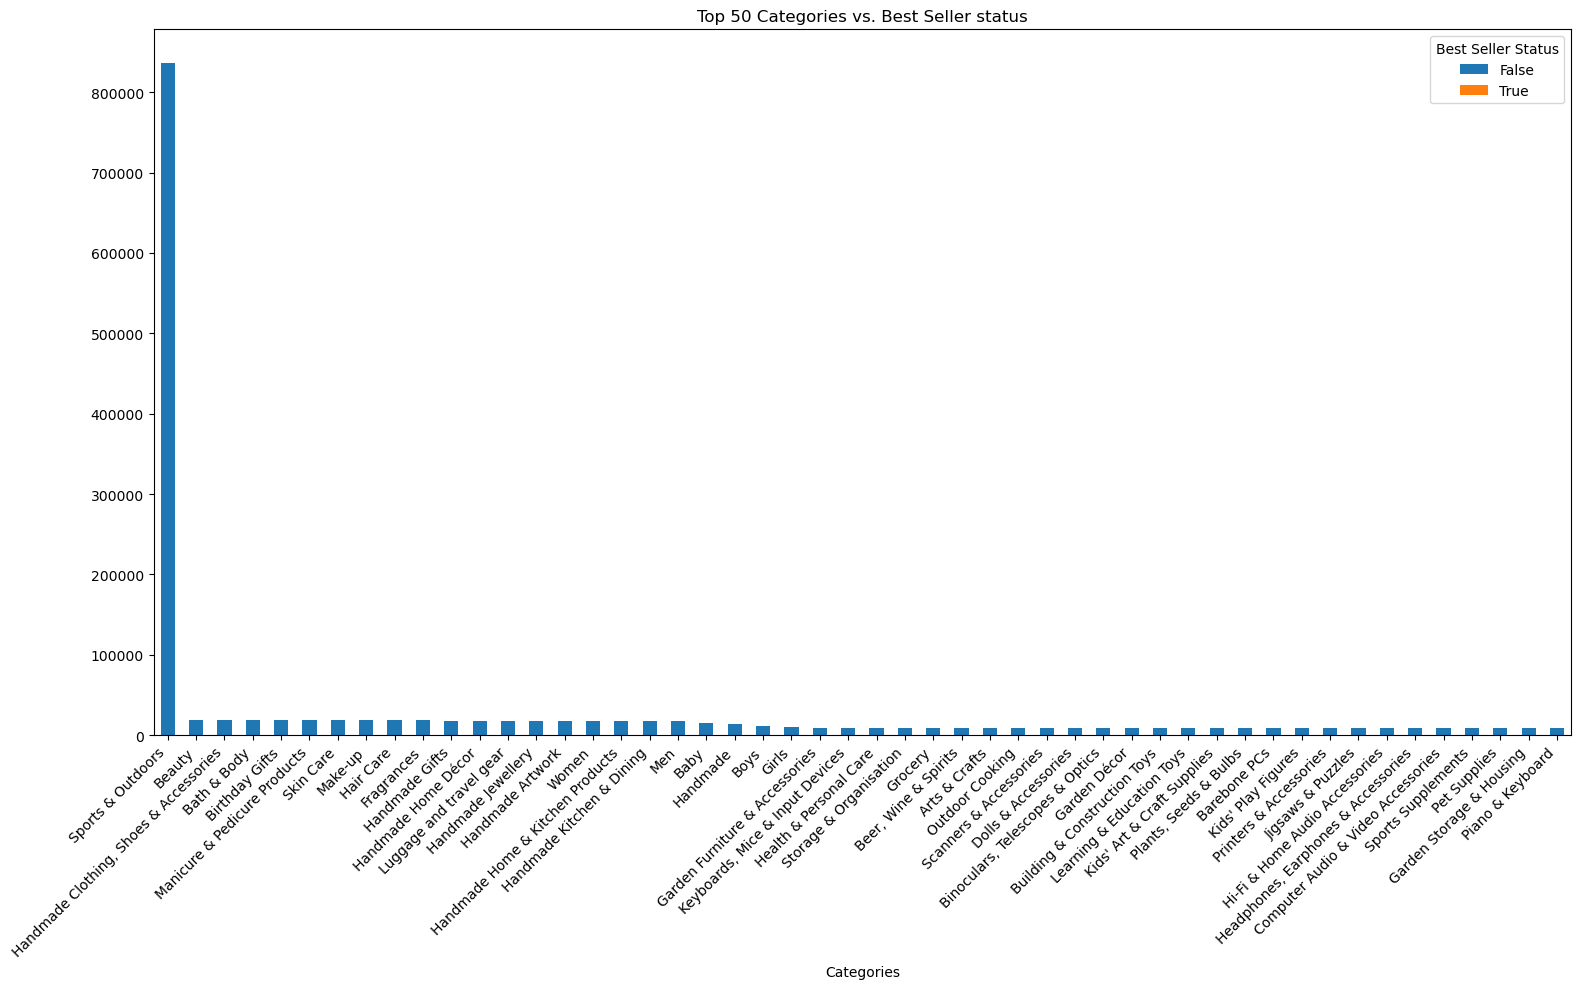

In [10]:
#1.3.1 Stacked bar chart
# First 50 categories with the highest frequency and its best seller status
top_categories = crosstab_category_bestseller.sum(axis=1).nlargest(50).index  
filtered_crosstab = crosstab_category_bestseller.loc[top_categories]

# Graficar solo las categorías principales
filtered_crosstab.plot(kind="bar", stacked=True, figsize=(16, 10))
plt.title("Top 50 Categories vs. Best Seller status")
plt.xlabel("Categories")
plt.legend(title="Best Seller Status")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands

## Objective
Investigate how different product categories influence product prices.

---

## 2.0. Preliminary Step: Remove Outliers in Product Prices

To ensure a more accurate analysis, we'll remove outliers in product prices using the **IQR (Interquartile Range)** method. 

1. Calculate the first quartile (Q1) and third quartile (Q3) of the product prices.
2. Compute the IQR:  
   **IQR = Q3 - Q1**
3. Identify outliers:
   - Products priced below **Q1 - 1.5 × IQR**
   - Products priced above **Q3 + 1.5 × IQR**
4. Remove these outliers from the dataset.

> **Hint**: Check the last "Check For Understanding" at the end of the lesson *EDA Bivariate Analysis* for guidance on implementing this.


In [11]:
#2.0. Remove outliers in product prices
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers, lower_bound, upper_bound




# Identify outliers
outliers, lower_bound, upper_bound = tukeys_test_outliers(df_amz["price"])

# Remove outliers
data_no_outliers_price = df_amz[(df_amz["price"] >= lower_bound) & (df_amz["price"] <= upper_bound)]

lower_bound: -44.01


## 2.1.Visualizations

### 1. Violin Plots
- **Purpose**: Visualize the distribution of product prices across different product categories.
- **Steps**:
  1. Filter the top 20 categories based on count for better visualization.
  2. Create violin plots for these categories.
- **Analysis**:
  - Identify which product category has the **highest median price** (consider all categories, not just the top 20).

C:\Users\celia\AppData\Local\Temp\ipykernel_4896\1069435371.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=top20_categories_no_outliers_price, x='category', y='price', palette="coolwarm")


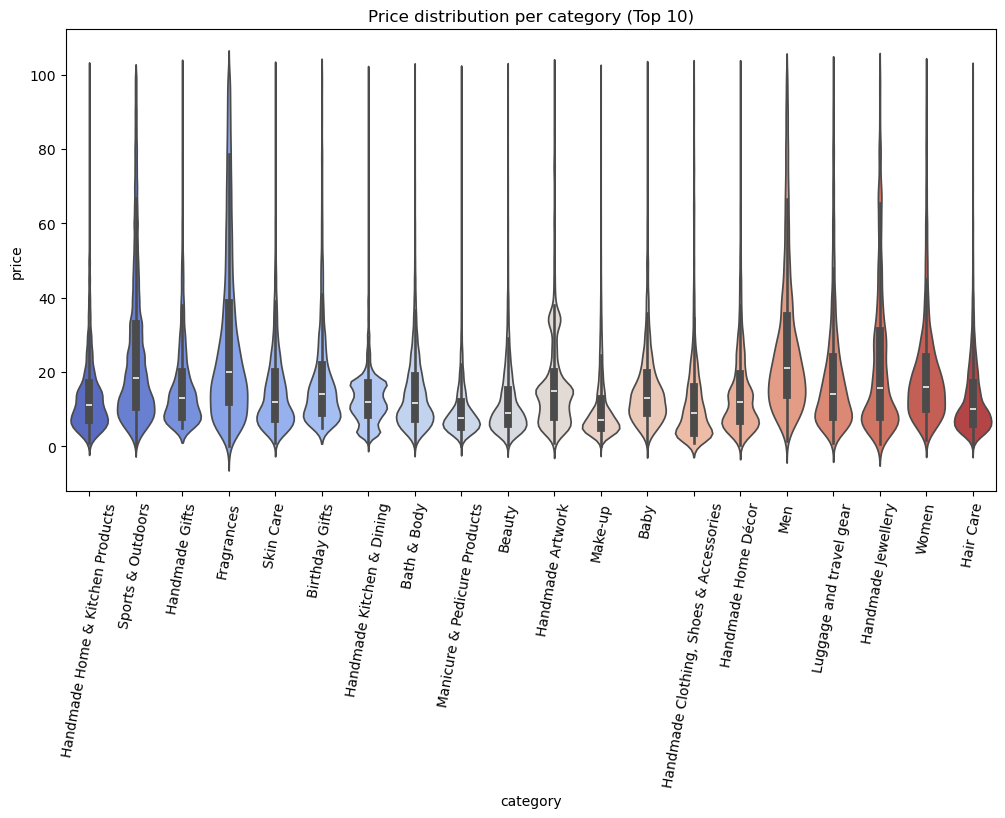

In [12]:
# 2.1.1 Plotting a violin plot to visualize the distribution of 'price' for each product 'category'
#2.1.1.1. Filter the top 20 categories
top20_categories = df_amz['category'].value_counts().head(20).index
#Filter dara to only include the top 20 categories
data_top20 = df_amz[df_amz['category'].isin(top20_categories)]
#Remove price outliers in this top 10 categories
top20_categories_no_outliers_price=data_top20[(data_top20['price']>=lower_bound) & (data_top20['price']<=upper_bound)]
#2.1.1.2.Graph the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=top20_categories_no_outliers_price, x='category', y='price', palette="coolwarm")
# Show plot
plt.title("Price distribution per category (Top 10)")
plt.xticks(rotation=80) 
plt.show()

In [13]:
#2.1.1.Analysis
# Calculate the median price per category including all categories and price outliers
median_prices = df_amz.groupby('category')['price'].median()

# Identify the category with the highest median price
highest_median_prices_category = median_prices.idxmax()
highest_median_prices_value = median_prices.max()

print(f"Product category with highest median price is '{highest_median_prices_category}' with a median price of {highest_median_prices_value}.")


Product category with highest median price is 'Laptops' with a median price of 1042.725.


In [14]:
#2.1.1.Analysis
# Calculate the median price per category including all categories and no price outliers
median_prices = data_no_outliers_price.groupby('category')['price'].median()

# Identify the category with the highest median price
highest_median_prices_category = median_prices.idxmax()
highest_median_prices_value = median_prices.max()

print(f"Product category with highest median price is '{highest_median_prices_category}' with a median price of {highest_median_prices_value}.")

Product category with highest median price is 'Desktop PCs' with a median price of 74.0.


## 2.2. Bar Charts
- **Purpose**: Compare the average price of products across categories.
- **Steps**:
  1. Filter the top 10 product categories (based on count).
  2. Create a bar chart to display average prices.
- **Analysis**:
  - Identify which product category has the **highest average price** (analyze all categories, not just the top 10).

C:\Users\celia\AppData\Local\Temp\ipykernel_4896\351120287.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_categories_no_outliers_price, x='category', y='price', palette="coolwarm")


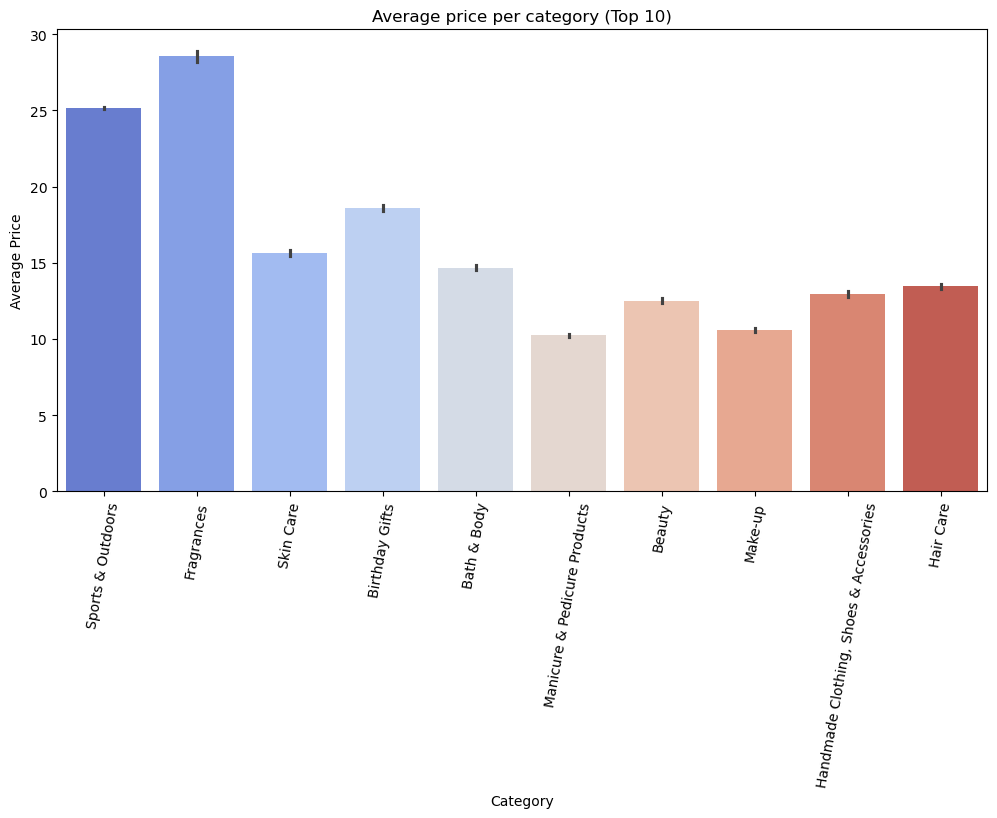

In [15]:
#2.2.1. Filter the top 10 product categories based on count
# Filter top10 categories
top10_categories = df_amz['category'].value_counts().head(10).index

# Filter all data for these top 10 categories
data_top10 = df_amz[df_amz['category'].isin(top10_categories)]

#Remove price outliers in this top 10 categories
top10_categories_no_outliers_price=data_top10[(data_top10['price']>=lower_bound) & (data_top10['price']<=upper_bound)]

#2.2.2. Create a bar chart to display average prices
#Bar chart for average price range per category
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_categories_no_outliers_price, x='category', y='price', palette="coolwarm")
# Data for the plot
plt.title("Average price per category (Top 10)")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.xticks(rotation=80)
plt.show()

In [16]:
#2.1.1.Analysis
# Calculate the average price per category including all categories and price outliers
mean_prices = df_amz.groupby('category')['price'].mean()

# Identify the category with the highest median price
highest_avg_prices_category = mean_prices.idxmax()
highest_avg_prices_value = mean_prices.max()

print(f"Product category with highest average price is '{highest_avg_prices_category}' with an average price of {highest_avg_prices_value}.")

Product category with highest average price is 'Laptops' with an average price of 1087.987826986755.


In [17]:
#2.1.1.Analysis
# Calculate the average price per category including all categories and no price outliers
mean_prices = data_no_outliers_price.groupby('category')['price'].mean()

# Identify the category with the highest median price
highest_avg_prices_category = mean_prices.idxmax()
highest_avg_prices_value = mean_prices.max()

print(f"Product category with highest average price is '{highest_avg_prices_category}' with an average price of {highest_avg_prices_value}.")

Product category with highest average price is 'Motherboards' with an average price of 68.77243243243242.


## 2.3. Box Plots
- **Purpose**: Visualize the distribution of product ratings by category.
- **Steps**:
  1. Filter the top 10 categories (based on count).
  2. Create side-by-side box plots to show the spread of ratings for these categories.
- **Analysis**:
  - Identify which category tends to have the **highest median rating** (consider all categories for this analysis).

C:\Users\celia\AppData\Local\Temp\ipykernel_4896\2604995207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='stars', data=data_top10, palette='coolwarm')


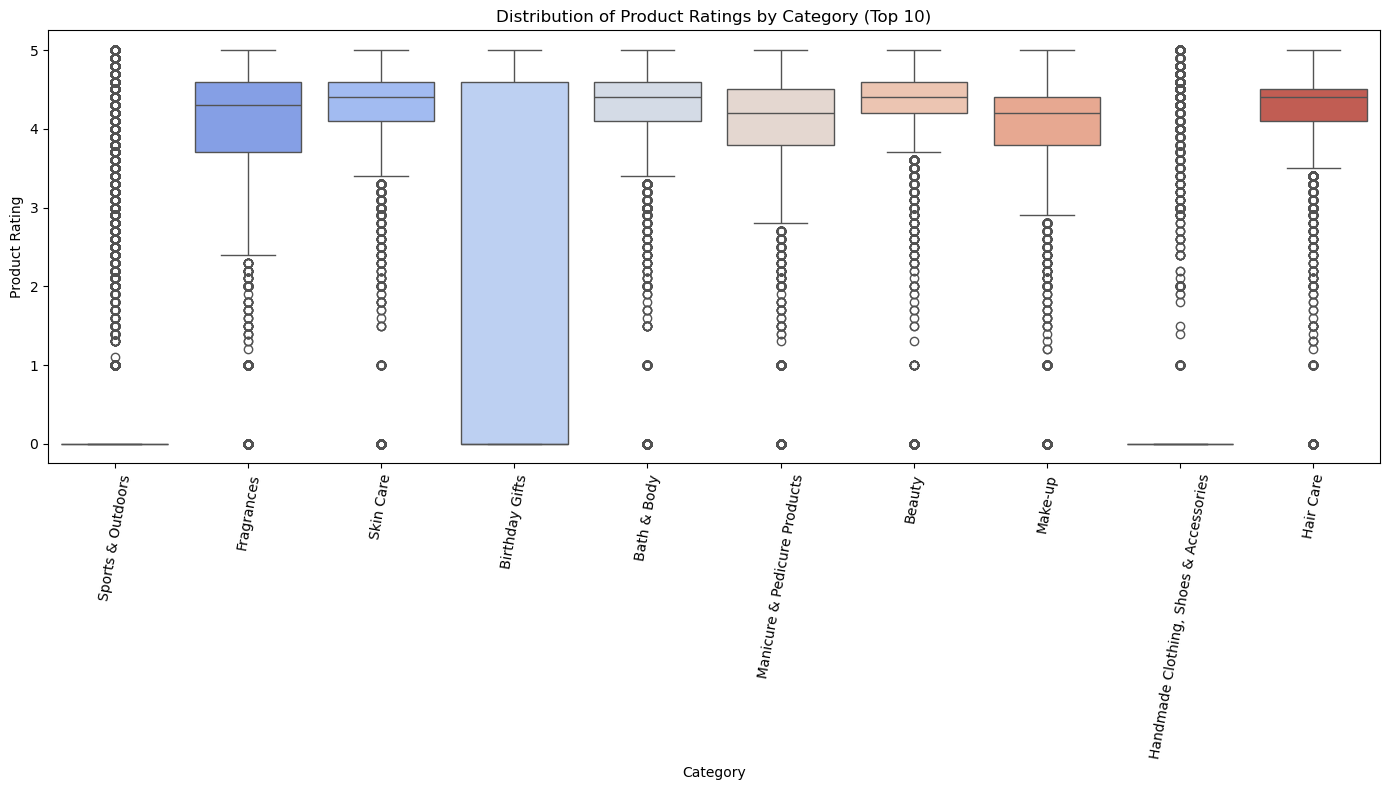

In [18]:
# 2.3.2. Create side-by-side box plots to visualize the distribution of ratings
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='stars', data=data_top10, palette='coolwarm')

# Adjustments for readability
plt.title("Distribution of Product Ratings by Category (Top 10)")
plt.xlabel("Category")
plt.ylabel("Product Rating")
plt.xticks(rotation=80)  # Rotate category labels for readability
plt.tight_layout()  # Automatically adjust layout to avoid overlapping

In [19]:
#2.3.3.Analysis
# Calculate the median rating per category including all categories
median_rating = df_amz.groupby('category')['stars'].median()

# Identify the category with the highest median price
highest_median_rating_category = median_rating.idxmax()
highest_median_rating_value = median_rating.max()

print(f"Product category with highest median rating is '{highest_median_rating_category}' with a median rating of {highest_median_rating_value}.")

Product category with highest median rating is 'Computer Memory' with a median rating of 4.7.


In [20]:
#2.3.3.Analysis
# Calculate the median rating per category including all categories and no price outlierts
median_rating = data_no_outliers_price.groupby('category')['stars'].median()

# Identify the category with the highest median price
highest_median_rating_category = median_rating.idxmax()
highest_median_rating_value = median_rating.max()

print(f"Product category with highest median rating is '{highest_median_rating_category}' with a median rating of {highest_median_rating_value}.")

Product category with highest median rating is 'Computer Memory' with a median rating of 4.7.


# Part 3: Investigating the Interplay Between Product Prices and Ratings

## Objective
Analyze how product ratings (stars) correlate with product prices.

---

## 3.1. Correlation Coefficients

- **Calculate the correlation coefficient** between price and stars.
- **Is there a significant correlation** between product price and its rating?


In [21]:
# 3.1.1.Calculate PEARSON and SPEARMAN correlation coefficients
#Calculate Pearson correlation for data without outliers in price column
pearson_corr = data_no_outliers_price['price'].corr(data_no_outliers_price['stars'])

# Calculate Spearman correlation for data without outliers in price column
spearman_corr = data_no_outliers_price['price'].corr(data_no_outliers_price['stars'], method='spearman')

# Print results
print("Correlation Coefficients")
print(f"- **Pearson Correlation**: {pearson_corr:.4f}")
print(f"- **Spearman Correlation**: {spearman_corr:.4f}\n")

# Interpretation
print("\nInterpretation:")
print("-" * 50)
print("The Pearson correlation measures the strength of a linear relationship between two variables,\nThe Spearman correlation measures the strength of a monotonic relationship, meaning that as one variable changes, the other tends to change in a consistent direction. \nBoth coefficients range from -1 (perfect negative relationship) to 1 (perfect positive relationship).")
print("\n")

# Classify Pearson correlation
if abs(pearson_corr) < 0.1:
    print(f"The Pearson correlation of {pearson_corr:.4f} indicates a very weak linear relationship.")
elif abs(pearson_corr) < 0.3:
    print(f"The Pearson correlation of {pearson_corr:.4f} indicates a weak linear relationship.")
elif abs(pearson_corr) < 0.5:
    print(f"The Pearson correlation of {pearson_corr:.4f} indicates a moderate linear relationship.")
else:
    print(f"The Pearson correlation of {pearson_corr:.4f} indicates a strong linear relationship.")

# Classify Spearman correlation
if abs(spearman_corr) < 0.1:
    print(f"The Spearman correlation of {spearman_corr:.4f} indicates a very weak monotonic relationship.")
elif abs(spearman_corr) < 0.3:
    print(f"The Spearman correlation of {spearman_corr:.4f} indicates a weak monotonic relationship.")
elif abs(spearman_corr) < 0.5:
    print(f"The Spearman correlation of {spearman_corr:.4f} indicates a moderate monotonic relationship.")
else:
    print(f"The Spearman correlation of {spearman_corr:.4f} indicates a strong monotonic relationship.")
print("-" * 50)


Correlation Coefficients
- **Pearson Correlation**: -0.0777
- **Spearman Correlation**: -0.0668


Interpretation:
--------------------------------------------------
The Pearson correlation measures the strength of a linear relationship between two variables,
The Spearman correlation measures the strength of a monotonic relationship, meaning that as one variable changes, the other tends to change in a consistent direction. 
Both coefficients range from -1 (perfect negative relationship) to 1 (perfect positive relationship).


The Pearson correlation of -0.0777 indicates a very weak linear relationship.
The Spearman correlation of -0.0668 indicates a very weak monotonic relationship.
--------------------------------------------------


In [22]:
#3.1.2. Is there a significant correlation between product price and its rating?
print("The Pearson and Spearman correlation both show a weak correlation between product price and ratings. So, price is not related in a linear or monotonic relation to the ratings")

The Pearson and Spearman correlation both show a weak correlation between product price and ratings. So, price is not related in a linear or monotonic relation to the ratings


## 3.2. Visualizations

1. **Scatter Plot**:
   - Use a scatter plot to visualize the relationship between product rating and price.
   - What patterns can you observe?

2. **Correlation Heatmap**:
   - Use a correlation heatmap to visualize correlations between all numerical variables.

3. **QQ Plot**:
   - Examine if product prices typically follow a normal distribution using a QQ plot.

<Axes: xlabel='price', ylabel='stars'>

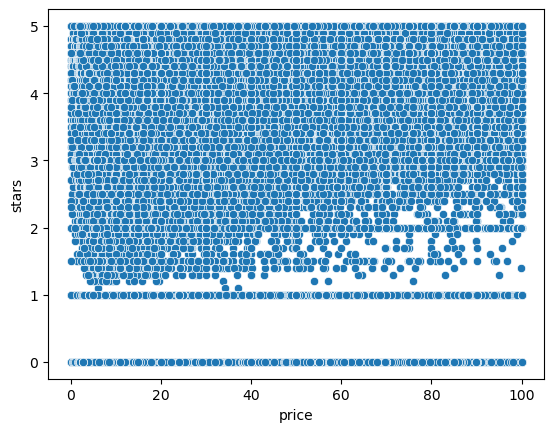

In [23]:
# 3.2.1.Plotting a scatter plot to visualize the relationship between 'stars' and 'price' with no outliers in price column
sns.scatterplot(data=data_no_outliers_price, x='price', y='stars')

In [24]:
#3.2.1. What patterns do you observe?
print("There is no a strong correlation between price and ratings.\nHigh-prices products do not necessary mean better ratings, although we can observe tha products above 40 avoid to have intermediate values between 1-2.\nMost products fall into ratings from 2.5-5")

There is no a strong correlation between price and ratings.
High-prices products do not necessary mean better ratings, although we can observe tha products above 40 avoid to have intermediate values between 1-2.
Most products fall into ratings from 2.5-5


In [25]:
# Displaying the data types of each column in the dataframe
df_amz.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [26]:
# Removing the ID column from the dataframe
df_amz.drop("uid", inplace=True, axis=1)

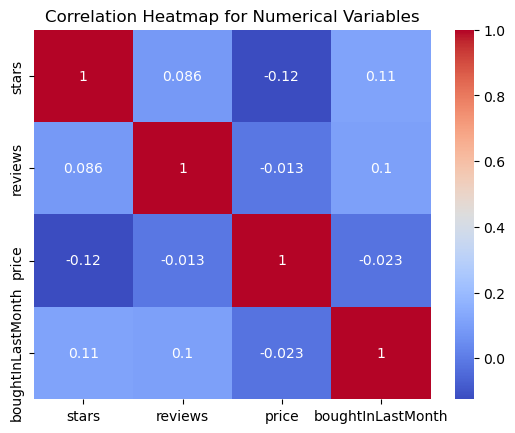

In [27]:
#3.2.2 Correlation heatmap bertween all numerical variables

# Numerical variables
df_numerical = df_amz.select_dtypes(include=["number"])
# Correlation matrix between numerical variables using Pearson method
correlation_matrix = df_numerical.corr()
# Plotting heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

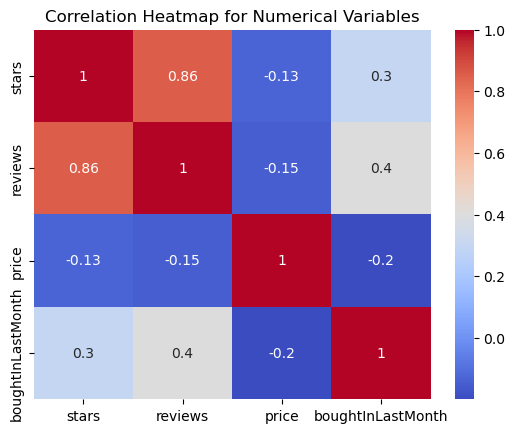

In [28]:
#3.2.2 Correlation heatmap bertween all numerical variables

# Correlation matrix between numerical variables using Spearman method
correlation_matrix = df_numerical.corr(method="spearman")
# Plotting heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

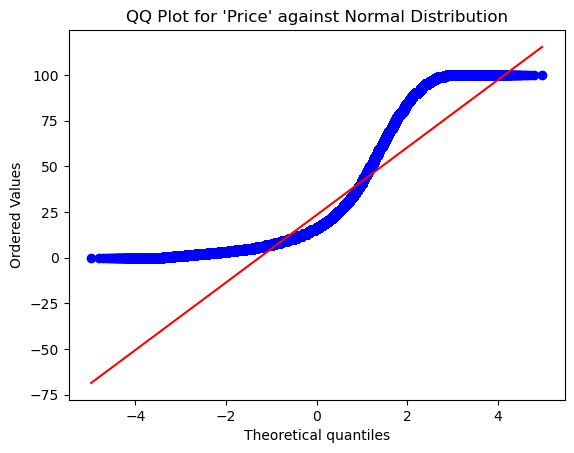

In [34]:
#3.2.3 QQ plot for price
# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
stats.probplot(data_no_outliers_price["price"], dist="norm", plot=plt)

# Show the plot
plt.title("QQ Plot for 'Price' against Normal Distribution")
plt.show()